<a href="https://colab.research.google.com/github/felicitymueni/Felicity-musau-Independent-project/blob/main/HYPOTHESIS_TESTING_REVISIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHESIS TESTING

# New Section

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# reading the data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.stats import weightstats as stests

In [4]:
#loading the data in the colab
df =  pd.read_csv("autolib_daily_events_postal_code.csv")


In [5]:
#Loading the last five records of the data
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [6]:
#loading the first five records of the data
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [7]:
#Describing the data in terms of mean,median and mode
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


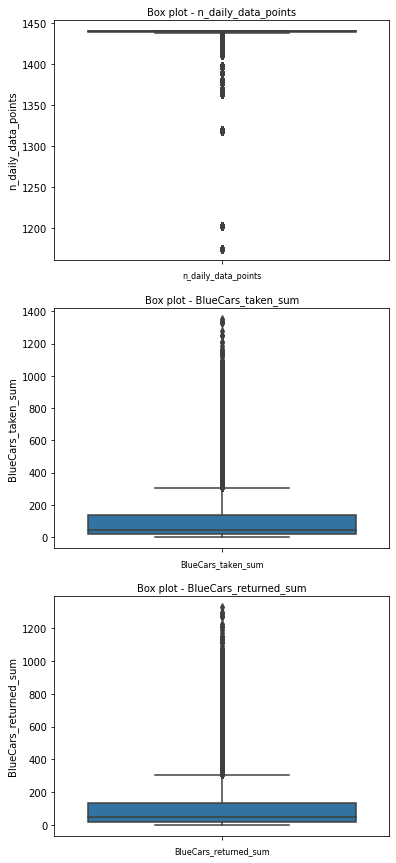

In [8]:
# Lets check for outlires in our data set
col_names = ['n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(6,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df [col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

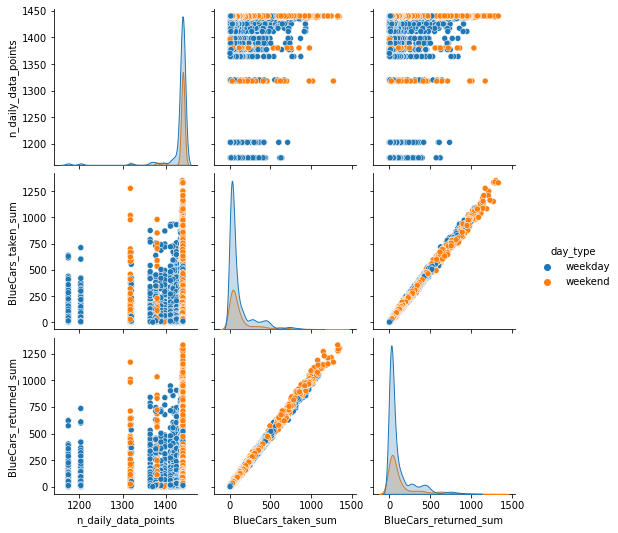

In [9]:
#checking if there is any pairing of the dependent and independent variables
sns.pairplot(df, vars = col_names, hue='day_type')

# hypothesis testing
1.   H0: There is no difference in Number of bluecars taken in area of postal code 75001 and 95880 on weekdays.
2.   H1: Number of bluecars taken in area of postal code 75001 is Not equal to 95880 on weekdays.
3.   Singnificance level = 0.05
4.   Z test will be used since the sample is more than 30

# Conclusion
we will reject the null hypothesis and accepct the alternate hypothesis.








In [10]:
weekend=df[df['day_type'] =='weekend']
weekend.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [11]:
df1 = weekend[weekend['Postal code'] == 75001]
df2 = weekend[weekend['Postal code'] == 95880]
df2.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
15934,95880,1/6/2018,1437,5,weekend,19,22,0,0,0,0,0,0
15935,95880,1/7/2018,1440,6,weekend,28,17,0,0,7,7,0,0
15941,95880,1/13/2018,1440,5,weekend,25,26,0,0,3,3,0,0
15942,95880,1/14/2018,1440,6,weekend,39,31,0,0,0,0,0,0
15948,95880,1/20/2018,1439,5,weekend,25,20,0,0,0,1,0,0


In [12]:
#finding the population mean of total bluecars taken
m_data = np.mean(df2['BlueCars_taken_sum'])
m_data

28.022727272727273

In [13]:
ztest, pval = stests.ztest(df1['BlueCars_taken_sum'], value=m_data)
print(float(pval))

1.1206342178969125e-144


In [14]:
if pval < 0.05:
  print("reject the null hypothesis")
else:
  print("Accept the null hypothesis")

reject the null hypothesis
